In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Access your dataset
data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/raw_dataset.csv'

In [4]:
df = pd.read_csv(data_path)
# Display the first few rows of the DataFrame
df.head()

,Invoice_Id,StockCode,Description,Quantity,Invoice_date,Price,Customer_Id,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536638 entries, 0 to 536637
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice_Id    536638 non-null  object 
 1   StockCode     536638 non-null  object 
 2   Description   535185 non-null  object 
 3   Quantity      536638 non-null  int64  
 4   Invoice_date  536638 non-null  object 
 5   Price         536638 non-null  float64
 6   Customer_Id   401604 non-null  float64
 7   Country       536638 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [6]:
df.describe()

,Quantity,Price,Customer_Id
count,536638.000000,536638.000000,401604.000000
mean,9.619975,4.673909,15281.160818
std,219.130759,94.857202,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Check for missing values
print(df.isnull().sum())

Invoice_Id           0
StockCode            0
Description       1453
Quantity             0
Invoice_date         0
Price                0
Customer_Id     135034
Country              0
dtype: int64


In [8]:
df.dropna(subset=['Description'], inplace=True)
df.dropna(subset=['Customer_Id'], inplace=True)

In [9]:
# Check for missing values
print(df.isnull().sum())

Invoice_Id      0
StockCode       0
Description     0
Quantity        0
Invoice_date    0
Price           0
Customer_Id     0
Country         0
dtype: int64


In [10]:
df.describe()

,Quantity,Price,Customer_Id
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df['Invoice_date'] = pd.to_datetime(df['Invoice_date'])

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.describe()

,Quantity,Invoice_date,Price,Customer_Id
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [14]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [15]:
df.describe()

,Quantity,Invoice_date,Price,Customer_Id
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


In [16]:
df.head()

,Invoice_Id,StockCode,Description,Quantity,Invoice_date,Price,Customer_Id,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
# Checking unique values for anomalies
df['StockCode'].unique()


array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [18]:
# Checking unique countries
df['Country'].unique()


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

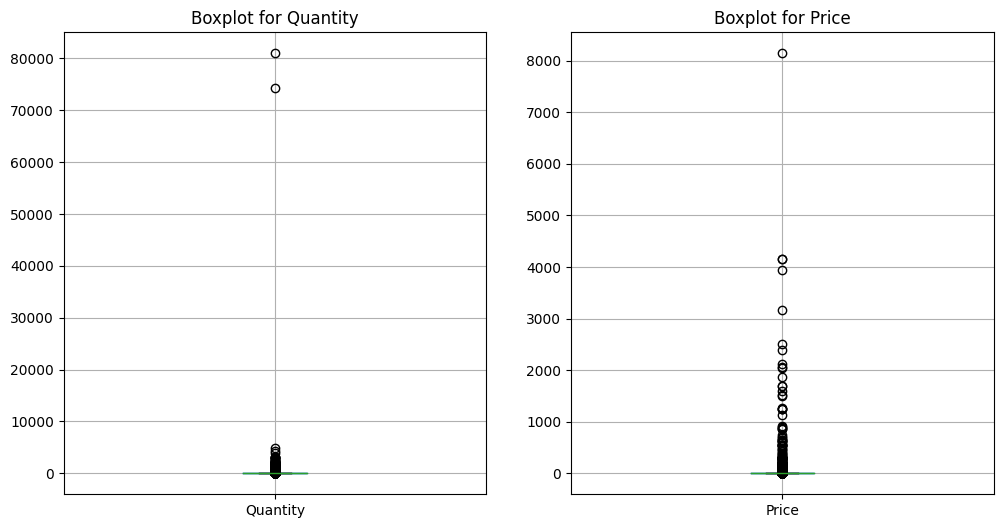

In [19]:
# Visualize Outliers

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Boxplot for Quantity
plt.subplot(1, 2, 1)
df.boxplot(column=['Quantity'])
plt.title('Boxplot for Quantity')

# Boxplot for Price
plt.subplot(1, 2, 2)
df.boxplot(column=['Price'])
plt.title('Boxplot for Price')

plt.show()


In [20]:
# Removing outliers beyond 99th percentile
df = df[df['Quantity'] < df['Quantity'].quantile(0.99)]
df = df[df['Price'] < df['Price'].quantile(0.99)]


In [21]:
# Detect and Handle Anomalies

# Keeping only positive quantities
df = df[df['Quantity'] > 0]


In [22]:
# Keeping only positive prices
df = df[df['Price'] > 0]


In [23]:
# Checking for anomalies in categorical columns
print(df['Country'].value_counts())
print(df['StockCode'].value_counts())


Country
United Kingdom          343011
Germany                   8525
France                    7899
EIRE                      6808
Spain                     2360
Belgium                   1886
Switzerland               1779
Netherlands               1721
Portugal                  1407
Norway                    1021
Australia                  923
Channel Islands            723
Italy                      719
Finland                    631
Cyprus                     577
Austria                    368
Denmark                    353
Poland                     320
Sweden                     316
Japan                      293
Israel                     241
Unspecified                235
Singapore                  212
Iceland                    181
USA                        178
Canada                     148
Greece                     140
Malta                      108
United Arab Emirates        64
RSA                         56
European Community          55
Lebanon                     43


In [24]:
# Check for remaining missing values
print(df.isnull().sum())

# Ensure all data types are correct
print(df.dtypes)


Invoice_Id      0
StockCode       0
Description     0
Quantity        0
Invoice_date    0
Price           0
Customer_Id     0
Country         0
dtype: int64
Invoice_Id              object
StockCode               object
Description             object
Quantity                 int64
Invoice_date    datetime64[ns]
Price                  float64
Customer_Id            float64
Country                 object
dtype: object


In [25]:
df.describe()

,Quantity,Invoice_date,Price,Customer_Id
count,383418.000000,383418,383418.000000,383418.000000
mean,9.856887,2011-07-10 23:58:37.916843264,2.699428,15297.678677
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-07 11:40:00,1.250000,13969.500000
50%,6.000000,2011-07-31 13:37:00,1.950000,15159.000000
75%,12.000000,2011-10-20 13:54:00,3.750000,16795.000000
max,117.000000,2011-12-09 12:50:00,14.550000,18287.000000
std,14.009346,NaN,2.466849,1709.355295


In [26]:
# saving the cleaned data set

cleaned_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/cleaned_dataset.csv'
df.to_csv(cleaned_data_path, index=False)
